<a href="https://colab.research.google.com/github/harshesh/Self-Driving-Car/blob/master/Convolutional_Neural_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.models import Model
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers import Dropout
from keras.optimizers import Adam
from keras.utils.np_utils import to_categorical
import random

Using TensorFlow backend.


In [0]:
np.random.seed(0)

In [3]:
(X_train, y_train), (X_test, y_test)= mnist.load_data()

print(X_train.shape)
print(X_test.shape)

11493376/11490434 [==============================] - 1s 0us/step
(60000, 28, 28)
(10000, 28, 28)


In [0]:
assert(X_train.shape[0] == y_train.shape[0]), "The number of images is not equal to the number of labels."
assert(X_train.shape[1:] == (28,28)), "The dimensions of the images are not 28 x 28."
assert(X_test.shape[0] == y_test.shape[0]), "The number of images is not equal to the number of labels."
assert(X_test.shape[1:] == (28,28)), "The dimensions of the images are not 28 x 28."

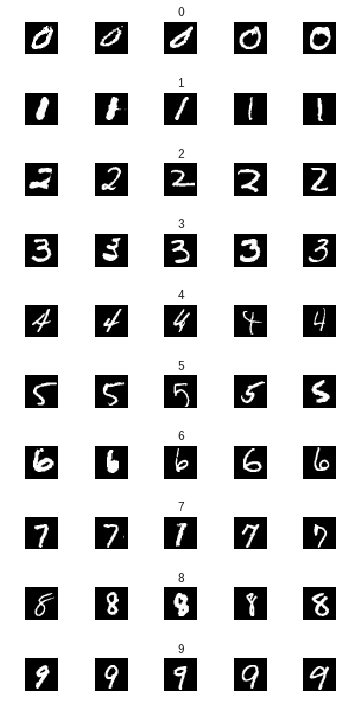

In [5]:
num_of_samples=[]
 
cols = 5
num_classes = 10

fig, axs = plt.subplots(nrows=num_classes, ncols=cols, figsize=(5,10))
fig.tight_layout()

for i in range(cols):
    for j in range(num_classes):
        x_selected = X_train[y_train == j]
        axs[j][i].imshow(x_selected[random.randint(0,(len(x_selected) - 1)), :, :], cmap=plt.get_cmap('gray'))
        axs[j][i].axis("off")
        if i == 2:
            axs[j][i].set_title(str(j))
            num_of_samples.append(len(x_selected))

[5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949]


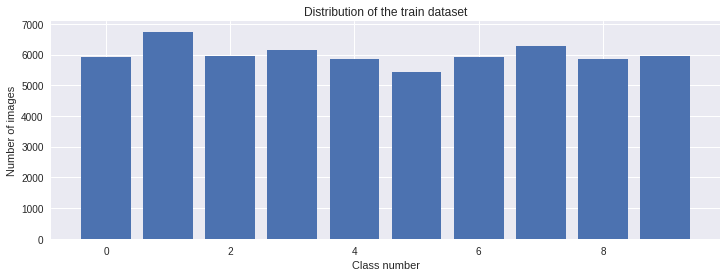

In [6]:
print(num_of_samples)
plt.figure(figsize=(12, 4))
plt.bar(range(0, num_classes), num_of_samples)
plt.title("Distribution of the train dataset")
plt.xlabel("Class number")
plt.ylabel("Number of images")
plt.show()

In [0]:
X_train = X_train.reshape(60000, 28, 28, 1)
X_test = X_test.reshape(10000, 28, 28, 1)

In [0]:
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [0]:
X_train = X_train/255
X_test = X_test/255

In [0]:
#define leNet_model function
def leNet_model():
    model = Sequential()
    model.add(Conv2D(30, (5, 5), input_shape = (28, 28, 1), activation = 'relu'))
    model.add(MaxPooling2D(pool_size = (2, 2)))
    model.add(Conv2D(15, (3, 3), activation = 'relu'))
    model.add(MaxPooling2D(pool_size = (2, 2)))
    model.add(Flatten())
    model.add(Dense(500, activation = 'relu'))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation = 'softmax'))
    model.compile(Adam(lr=0.01), loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [11]:
model = leNet_model()
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 24, 24, 30)        780       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 30)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 10, 10, 15)        4065      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 15)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 375)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 500)               188000    
_________________________________________________________________
dropout_1 (Dropout)          (None, 500)               0         
__________

In [12]:
history = model.fit(X_train, y_train, epochs = 10, validation_split= 0.1, batch_size = 400, verbose = 1, shuffle = 1) 

Train on 54000 samples, validate on 6000 samples
Epoch 1/10
54000/54000 [==============================] - 53s 981us/step - loss: 0.2480 - acc: 0.9198 - val_loss: 0.0460 - val_acc: 0.9858
Epoch 2/10
54000/54000 [==============================] - 52s 967us/step - loss: 0.0711 - acc: 0.9781 - val_loss: 0.0455 - val_acc: 0.9858
Epoch 3/10
54000/54000 [==============================] - 52s 961us/step - loss: 0.0616 - acc: 0.9810 - val_loss: 0.0477 - val_acc: 0.9863
Epoch 4/10
54000/54000 [==============================] - 52s 961us/step - loss: 0.0510 - acc: 0.9844 - val_loss: 0.0338 - val_acc: 0.9912
Epoch 5/10
54000/54000 [==============================] - 53s 982us/step - loss: 0.0466 - acc: 0.9855 - val_loss: 0.0367 - val_acc: 0.9877
Epoch 6/10
54000/54000 [==============================] - 52s 968us/step - loss: 0.0439 - acc: 0.9864 - val_loss: 0.0272 - val_acc: 0.9922
Epoch 7/10
54000/54000 [==============================] - 52s 967us/step - loss: 0.0366 - acc: 0.9883 - val_loss: 0.0

Text(0.5,0,'epochs')

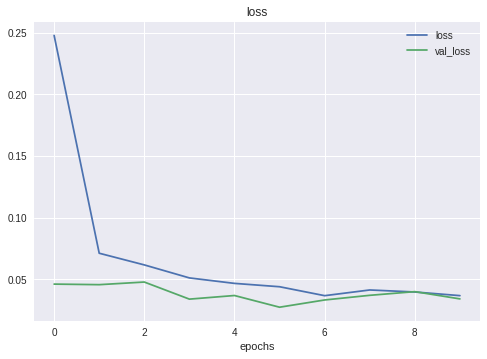

In [13]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss', 'val_loss'])
plt.title('loss')
plt.xlabel('epochs')

Text(0.5,0,'epochs')

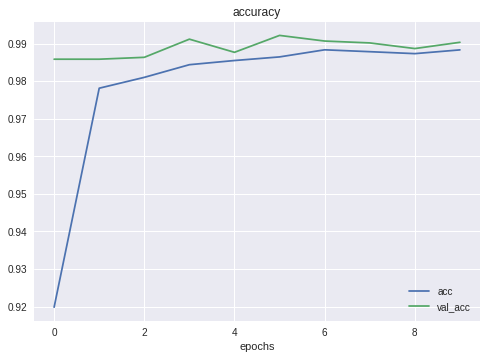

In [14]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.legend(['acc', 'val_acc'])
plt.title('accuracy')
plt.xlabel('epochs')

In [15]:
score = model.evaluate(X_test, y_test, verbose = 0)
print(type(score))
print('test score: ', score[0])
print('test accuracy: ', score[1])

<class 'list'>
test score:  0.03881623501136196
test accuracy:  0.9898


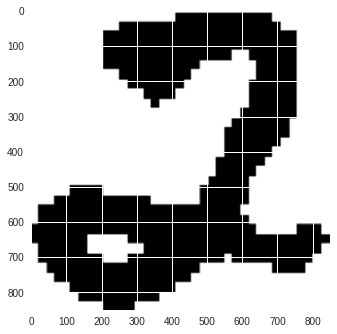

In [16]:
import requests
from PIL import Image
url = 'https://www.researchgate.net/profile/Jose_Sempere/publication/221258631/figure/fig1/AS:305526891139075@1449854695342/Handwritten-digit-2.png'
response = requests.get(url, stream =True)
img = Image.open(response.raw)
plt.imshow(img)

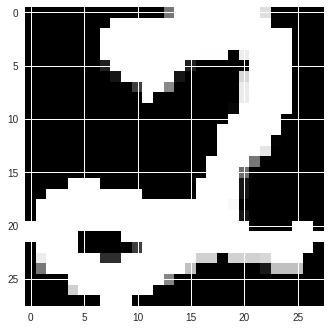

In [17]:
import cv2
img_array = np.asarray(img)
resized = cv2.resize(img_array, (28, 28))

gray_scale = cv2.cvtColor(resized, cv2.COLOR_BGR2GRAY)
image = cv2.bitwise_not(gray_scale)
plt.imshow(image, cmap = plt.get_cmap('gray'))

In [0]:
image = image/255
image = image.reshape(1, 28, 28, 1)

In [19]:
prediction = model.predict_classes(image)
print("predicted digit is ", str(prediction))

predicted digit is  [2]


In [20]:
layer1 = Model(inputs = model.layers[0].input, outputs=model.layers[0].output)
layer2 = Model(inputs = model.layers[0].input, outputs=model.layers[2].output)
visual1 = layer1.predict(image)
visual2 = layer2.predict(image)
print(visual1.shape)
print(visual2.shape)

(1, 24, 24, 30)
(1, 10, 10, 15)


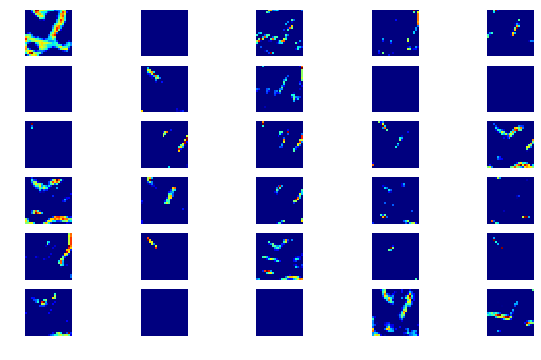

In [21]:
plt.figure(figsize = (10, 6))
for i in range(30):
    plt.subplot(6, 5, i + 1)
    plt.imshow(visual1[0, :, :, i], cmap = plt.get_cmap('jet'))
    plt.axis('off')
    

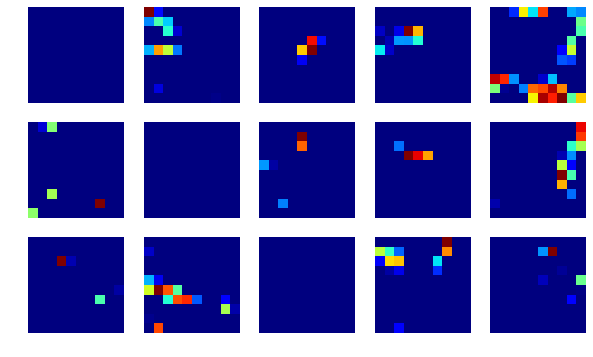

In [22]:
plt.figure(figsize = (10, 6))
for i in range(15):
    plt.subplot(3, 5, i + 1)
    plt.imshow(visual2[0, :, :, i], cmap = plt.get_cmap('jet'))
    plt.axis('off')
    